## Pre-Analysis Check: Change of Pupil Diameter during Block

This script processes and visualizes pupil data from multiple CSV files by averaging measurements from different experimental blocks and plotting these averages for comparison across the first and second half of each block.


It first reads the pupil data from each file, separating it into the four blocks based on the condition (acquisition, extinction).
For each block, it aggregates data across all files into large arrays. It then calculates the average pupil size for the first and second halves of each block and stores these averages in separate arrays. 
Finally, the script visualizes these averages, comparing the first and second halves of each block across all files.
The resulting plots are displayed in a 2x2 grid, with each subplot showing the average pupil size for one of the four experimental blocks.

In [1]:
# Import necessary libraries
import numpy as np
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Define file path
data_dir = '../data/SingleTrialPupilData'
plot_dir = '../plots'

In [4]:
# List all files in the data directory
files = os.listdir(data_dir)

In [5]:
# Defining the number of trials and time points
trials_per_block = {1: 72, 2: 108, 3: 72, 4: 108} # Block 1 and 3 have 72 trials, Block 2 and 4 have 108 trials
time_points = 3300 # Each trial has 3300 recorded time points

# Initialize arrays to hold all trials' data for each block
all_blocks = {i: np.zeros((trials_per_block[i] * len(files), time_points)) for i in range(1, 5)}

In [6]:
# Load data from each file and divide it into the corresponding block array
for i_file, file in enumerate(files):
    
    # Read pupil data from the CSV file
    df_pupil = pd.read_csv(os.path.join(data_dir, file))
    
    # Process each block; the key 'condorder' corresponds to the block number
    for block_num in range(1, 5):
        block_data = df_pupil[df_pupil['condorder'] == block_num]  # Get all data for this block
        
        start_index = trials_per_block[block_num] * i_file 
        end_index = trials_per_block[block_num] * (i_file + 1)
        
        # Append pupil data to all_blocks
        all_blocks[block_num][start_index:end_index] = block_data.loc[:, '0':'3299']


In [7]:
# Initialize arrays to store mean pupil data for the first and second halves of each block
all_mean_first_half = {i: np.zeros((len(files), time_points)) for i in range(1, 5)}
all_mean_second_half = {i: np.zeros((len(files), time_points)) for i in range(1, 5)}

In [8]:
# Compute the average pupil data for the first and second halves of each block
for i_file, file in enumerate(files):    
    df_pupil = pd.read_csv(os.path.join(data_dir, file))
    
    for block_num in range(1, 5):
        block_data = df_pupil[df_pupil['condorder'] == block_num]  # Get all data from this block
        block_data =  np.array(block_data.loc[:,'0'::])
    
        middle_trial = trials_per_block[block_num] // 2
        
        mean_first_half = np.mean(block_data[0:middle_trial,:], axis = 0)
        mean_second_half = np.mean(block_data[middle_trial::,:], axis = 0)

        all_mean_first_half[block_num][i_file] = mean_first_half
        all_mean_second_half[block_num][i_file] = mean_second_half

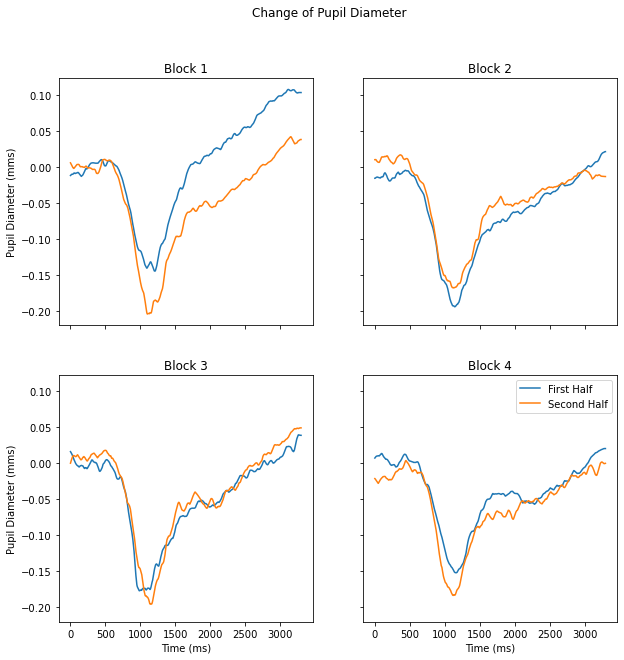

In [9]:
# Plotting
fig, ax = plt.subplots(2,2, sharey = True, sharex = True, figsize = [10,10])
plt.subplots_adjust(wspace=.2, hspace=.2)

fig.suptitle('Change of Pupil Diameter')

# Titles and plotting for each block
for block_num, subplot in zip(range(1, 5), ax.flat):
    subplot.set_title(f'Block {block_num}')
    
    subplot.plot(np.mean(all_mean_first_half[block_num], axis=0), label='First Half')
    subplot.plot(np.mean(all_mean_second_half[block_num], axis=0), label='Second Half')
    
ax[1,0].set_xlabel('Time (ms)')
ax[1,1].set_xlabel('Time (ms)')

ax[0,0].set_ylabel('Pupil Diameter (mms)')
ax[1,0].set_ylabel('Pupil Diameter (mms)')

ax[1,1].legend()
plt.savefig('{}/check_pupil.png'.format(plot_dir))